In [1]:
from sklearn import datasets
boston = datasets.load_boston()


In [2]:
boston.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [3]:
print boston.data.shape

(506, 13)


In [4]:
boston.feature_names


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='|S7')

In [5]:
import pandas as pd
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [6]:
boston_df['VAL'] = boston.target

In [7]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,VAL
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
from sklearn.cross_validation import train_test_split
X = boston_df[boston_df.columns[:13]]
Y = boston_df['VAL']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


/Users/henar/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
from sklearn.linear_model import LinearRegression

# Instancio mi regresion
boston_houseprice_lm = LinearRegression()

In [10]:
# Entreno con mi conjunto de entrenamiento (imaginemos que todo el dataset)
boston_houseprice_lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
boston_houseprice_lm.coef_

array([-1.56381297e-01,  3.85490972e-02, -2.50629921e-02,  7.86439684e-01,
       -1.29469121e+01,  4.00268857e+00, -1.16023395e-02, -1.36828811e+00,
        3.41756915e-01, -1.35148823e-02, -9.88866034e-01,  1.20588215e-02,
       -4.72644280e-01])

In [12]:
 pd.DataFrame({'columns': X.columns, 'coefs': boston_houseprice_lm.coef_})

,coefs,columns
0,-0.156381,CRIM
1,0.038549,ZN
2,-0.025063,INDUS
3,0.786440,CHAS
4,-12.946912,NOX
5,4.002689,RM
6,-0.011602,AGE
7,-1.368288,DIS
8,0.341757,RAD
9,-0.013515,TAX


In [37]:
boston_houseprice_lm.intercept_

32.8589326340861

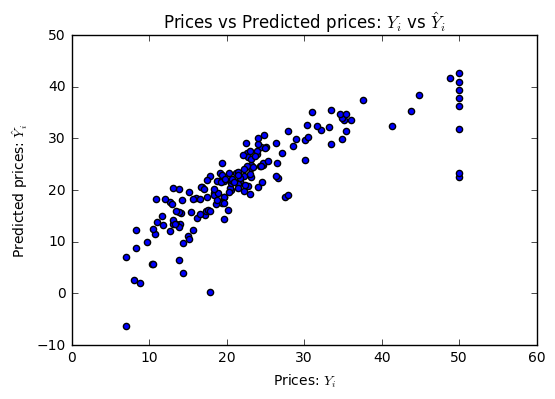

In [13]:
import matplotlib.pyplot as plt
Y_pred = boston_houseprice_lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [14]:
result = pd.DataFrame()
result["VAL"] = Y_test
result["VALPRED"] = Y_pred
result["ERRORVAL"] = abs(result.VAL - result.VALPRED)
result.head(3)

,VAL,VALPRED,ERRORVAL
226,37.6,37.467236,0.132764
292,27.9,31.391547,3.491547
90,22.6,27.120196,4.520196


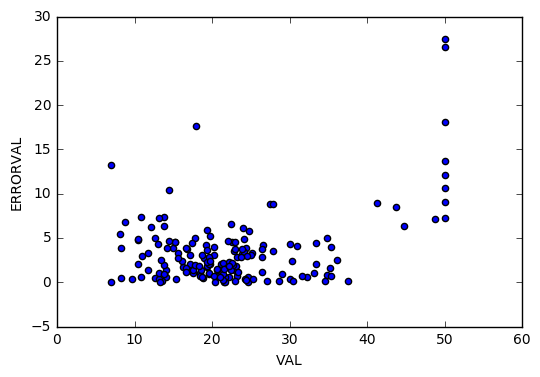

In [15]:
import matplotlib.pyplot as plt


result.plot(kind='scatter', x='VAL', y='ERRORVAL')
plt.show()

In [16]:
from sklearn.metrics import r2_score

print(r2_score(Y_test, Y_pred))


0.6955388005506405


In [62]:
Y_pred = boston_houseprice_m.predict(X_test)
r2_score(Y_test, Y_pred) 

0.6873258550855783

In [32]:
from sklearn.metrics import mean_squared_error
print('Linear model, coefficients: ', boston_houseprice_lm.coef_)
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(Y_test, Y_pred)))
print("r2_score (linear model): {:.2f}".format(r2_score(Y_test, Y_pred)))


('Linear model, coefficients: ', array([-1.56381297e-01,  3.85490972e-02, -2.50629921e-02,  7.86439684e-01,
       -1.29469121e+01,  4.00268857e+00, -1.16023395e-02, -1.36828811e+00,
        3.41756915e-01, -1.35148823e-02, -9.88866034e-01,  1.20588215e-02,
       -4.72644280e-01]))
Mean squared error (linear model): 33.39
r2_score (linear model): 0.64


/Users/henar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  from ipykernel import kernelapp as app


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1160eb890>,
      dtype=object)

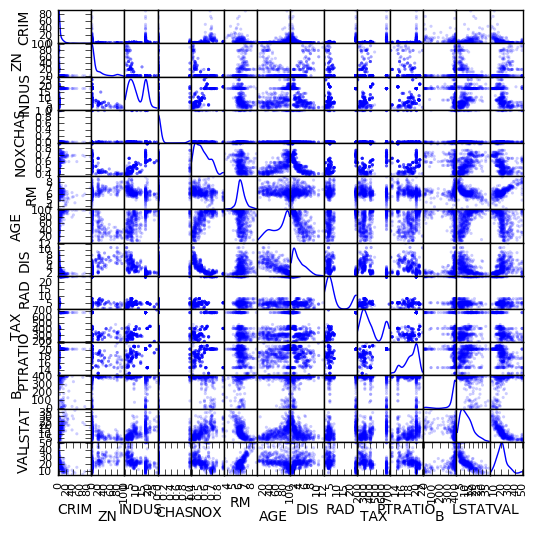

In [22]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(boston_df, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [21]:
from sklearn.linear_model import Ridge 

# Instancio mi regresion
rigde_model = Ridge()
rigde_model.fit(X_train, Y_train)
rigde_model.coef_


array([-0.15284685,  0.0397696 , -0.05156612,  0.63428674, -6.35714924,
        4.00925859, -0.01709152, -1.27297943,  0.32788793, -0.0143354 ,
       -0.92053665,  0.01186824, -0.48449948])

In [22]:
Y_pred = rigde_model.predict(X_test)
r2_score(Y_test, Y_pred) 

0.6873258550855783

In [23]:
from sklearn.linear_model import Lasso 

# Instancio mi regresion
lasso_model = Lasso()
lasso_model.fit(X_train, Y_train)
lasso_model.coef_

array([-0.08969683,  0.03733447, -0.01952574,  0.        , -0.        ,
        1.08821218,  0.00998006, -0.5426467 ,  0.29289423, -0.01573093,
       -0.82804265,  0.00841326, -0.69731783])

In [24]:
Y_pred = lasso_model.predict(X_test)
r2_score(Y_test, Y_pred) 

0.6438325003923028

In [38]:
from sklearn.linear_model import LassoCV

# Instancio mi regresion
model = LassoCV()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
r2_score(Y_test, Y_pred) 

0.6581706754174182

In [39]:
from sklearn.linear_model import RidgeCV

# Instancio mi regresion
model = RidgeCV()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
r2_score(Y_test, Y_pred) 

0.6942866195309755